## Imports

In [1]:
# Standard
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix

## Constantes

In [2]:
COLOR_NO_DISASTER = '#3498db'
COLOR_DISASTER = '#e74c3c'
COLOR_GENERAL = '#95a5a6'

SEED = 42

## Datos

In [3]:
data_path = pathlib.Path("../.data/raw")
df = pd.read_csv(data_path / "train.csv")
test_df = pd.read_csv(data_path / "test.csv")

In [4]:
target_mean = df['target'].mean()
print(f'Shape del dataset: {df.shape}')
print(f'Porcentaje de desastres en el target: {target_mean*100:.2f}%')
df.sample(5, random_state=SEED)

Shape del dataset: (7613, 5)
Porcentaje de desastres en el target: 42.97%


,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


## Feature Engineering

In [5]:
# DummyClassifier no necesita features complejas, solo el target
X = df[['id']]  # Usamos id como placeholder
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(f'Shape de X_train: {X_train.shape}')

Shape de X_train: (6090, 1)


## Entrenamiento del modelo

In [6]:
# Modelo Dummy: predice de forma estratificada según la distribución de clases
dummy_clf = DummyClassifier(strategy="stratified", random_state=SEED)
dummy_clf.fit(X_train, y_train)

print('Estrategia: stratified (predice aleatoriamente según distribución de clases)')
print(f'Distribución de clases en train: {dict(zip(*np.unique(y_train, return_counts=True)))}')

Estrategia: stratified (predice aleatoriamente según distribución de clases)
Distribución de clases en train: {np.int64(0): np.int64(3473), np.int64(1): np.int64(2617)}


## Análisis Final

F1-Score: 0.4565


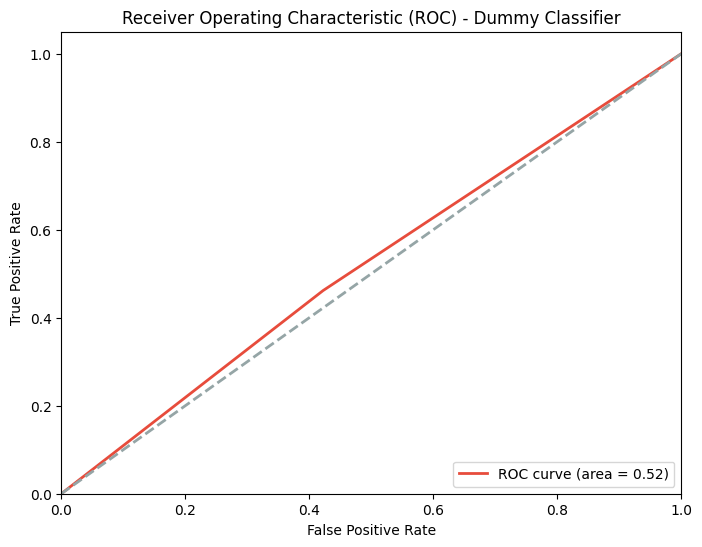

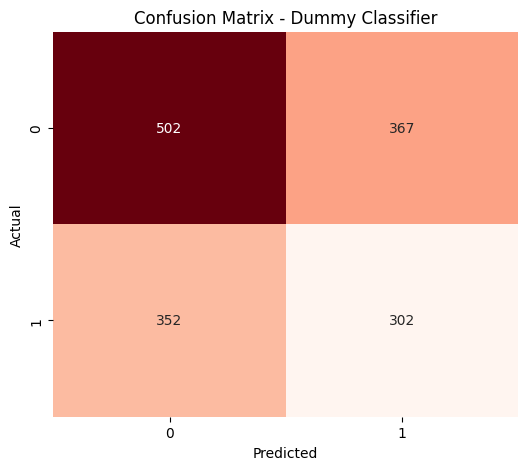

In [7]:
# Predicciones
y_pred = dummy_clf.predict(X_test)
y_probs = dummy_clf.predict_proba(X_test)[:, 1]

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

# 1. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=COLOR_DISASTER, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color=COLOR_GENERAL, lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Dummy Classifier')
plt.legend(loc="lower right")
plt.show()

# 2. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Dummy Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Submission

In [8]:
# Generar submission
X_submission = test_df[['id']]
y_pred_sub = dummy_clf.predict(X_submission)

submission = pd.DataFrame({'id': test_df['id'], 'target': y_pred_sub})

submission_path = pathlib.Path("../.data/submission")
submission_path.mkdir(parents=True, exist_ok=True)
submission.to_csv(submission_path / "random_prediction_submission.csv", index=False)

print(f"Submission guardada en {submission_path / 'random_prediction_submission.csv'}")

Submission guardada en ..\.data\submission\random_prediction_submission.csv
